In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [2]:
df = pd.read_csv("/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.shape

(500, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [8]:
df.duplicated().sum()

0

In [9]:
df.drop(columns=['Serial No.'],inplace=True)

In [11]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [13]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
mm = MinMaxScaler()

In [32]:
X_train_scaled = mm.fit_transform(X_train)
X_test_scaled = mm.fit_transform(X_test)

In [33]:
X_train_scaled.shape

(400, 7)

In [34]:
X_train_scaled

array([[0.62      , 0.67857143, 0.5       , ..., 0.71428571, 0.65064103,
        1.        ],
       [0.52      , 0.67857143, 0.75      , ..., 1.        , 0.55769231,
        0.        ],
       [0.26      , 0.35714286, 0.5       , ..., 0.42857143, 0.54487179,
        0.        ],
       ...,
       [0.24      , 0.25      , 0.        , ..., 0.14285714, 0.14423077,
        0.        ],
       [0.38      , 0.46428571, 0.25      , ..., 0.71428571, 0.28205128,
        0.        ],
       [0.48      , 0.5       , 0.25      , ..., 0.57142857, 0.46474359,
        0.        ]])

In [36]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [86]:
model = Sequential()

In [87]:
model.add(Dense(7, activation='relu', input_dim=7))
model.add(Dense(7, activation='relu', input_dim=7))
model.add(Dense(1, activation='linear'))  # always use linear activation function in output while working with a regression problem

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [88]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [89]:
model.compile(loss='mean_squared_error', optimizer='Adam')

In [90]:
history = model.fit(X_train_scaled, y_train, epochs=1000, validation_split=0.2)

Epoch 1/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0417 - val_loss: 0.0271
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0240 - val_loss: 0.0174
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0169 - val_loss: 0.0138
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0120 - val_loss: 0.0123
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0135 - val_loss: 0.0114
Epoch 6/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0116 - val_loss: 0.0106
Epoch 7/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0097 - val_loss: 0.0099
Epoch 8/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0101 - val_loss: 0.0093
Epoch 9/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0083 - val_loss: 0.0088
Epoch 10/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0081 - val_loss: 0.0084
Epoch 11/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0089 - val_loss: 0.0079
Epoch 12/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/ste

In [92]:
from matplotlib import pyplot as plt

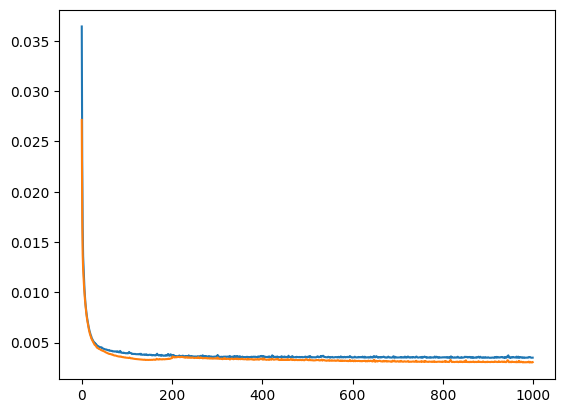

In [93]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [94]:
y_pred = model.predict(X_test_scaled)
y_pred

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[0.921089  ],
       [0.7974603 ],
       [0.5594832 ],
       [0.6774638 ],
       [0.8027432 ],
       [0.8620988 ],
       [0.4314985 ],
       [0.5994122 ],
       [0.8042549 ],
       [0.78142565],
       [0.67956114],
       [0.6911861 ],
       [0.6299912 ],
       [0.9434754 ],
       [0.8138083 ],
       [0.46011487],
       [0.8428057 ],
       [0.588188  ],
       [0.48793015],
       [0.5154766 ],
       [0.62992305],
       [0.5584948 ],
       [0.7044398 ],
       [0.76217043],
       [0.7540965 ],
       [0.57709306],
       [0.9604768 ],
       [0.85179955],
       [0.6013203 ],
       [0.7386659 ],
       [0.51090676],
       [0.71126914],
       [0.49928793],
       [0.85382515],
       [0.6114443 ],
       [0.7030804 ],
       [0.5306041 ],
       [0.97446454],
       [0.60873234],
       [0.68420076],
       [0.9702034 ],
       [0.55762607],
       [0.65498054],
       [0.8528048 ],
       [0.9494958 ],
       [0.53453785],
       [0.9614544 ],
       [0.823

In [96]:
from sklearn.metrics import r2_score, mean_squared_error

In [97]:
r2_score(y_test, y_pred)

0.7822287341457805

In [98]:
mean_squared_error(y_test, y_pred)

0.0044534223867187875